In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


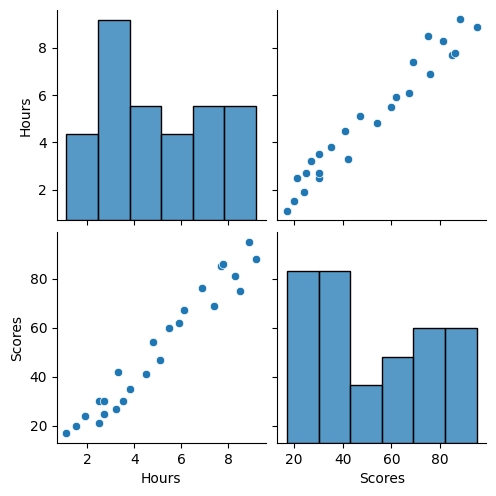

In [6]:
sns.pairplot(data)

In [32]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [33]:
y

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
line = model.coef_*X + model.intercept_

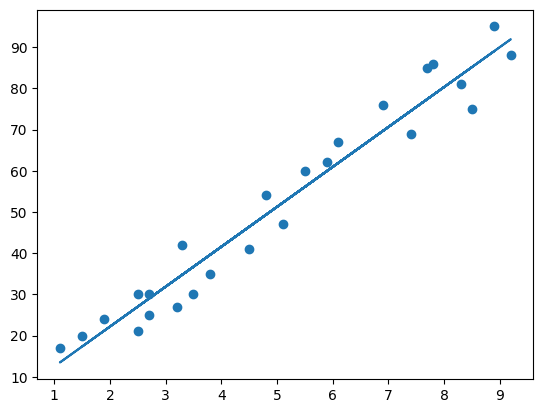

In [39]:
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [41]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

    Hours
8     8.3
16    2.5
0     2.5
23    6.9
11    5.9


In [67]:
df = pd.DataFrame(columns=['Actual','Predicted'],data=[[y_test,y_pred]])
df

,Actual,Predicted
0,Scores 8 81 16 30 0 21 23...,"[[83.18814103588203], [27.03208774003898], [27..."


In [70]:
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [92.38611528]


In [71]:
print('Mean Absolute Error:',
      mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
